In [135]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
housing = fetch_california_housing()


# 14 Улучшение качества модели

In [136]:
df = pd.read_csv('../../src/heart.csv')

## Анализ массива

### загрузка данных

In [137]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


<Axes: xlabel='HeartDisease', ylabel='count'>

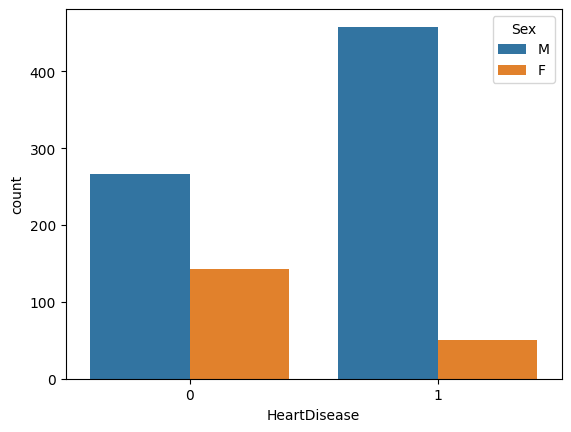

In [138]:
sns.countplot(data=df, x='HeartDisease', hue='Sex')

In [139]:
# перевод категориальных переменных в цифровые значения
df = pd.get_dummies(df) * 1

In [140]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0
Sex_F,918.0,0.210240,0.407701,0.0,0.00,0.0,0.0,1.0
Sex_M,918.0,0.789760,0.407701,0.0,1.00,1.0,1.0,1.0
ChestPainType_ASY,918.0,0.540305,0.498645,0.0,0.00,1.0,1.0,1.0


### проверка наличия пропусков в массиве

In [141]:
for col in df.columns:
    if df[col].isnull().sum():
        raise print(f"из None column {col}", df[col].isnull().sum())

### визуализация данных

<Figure size 200x160 with 0 Axes>

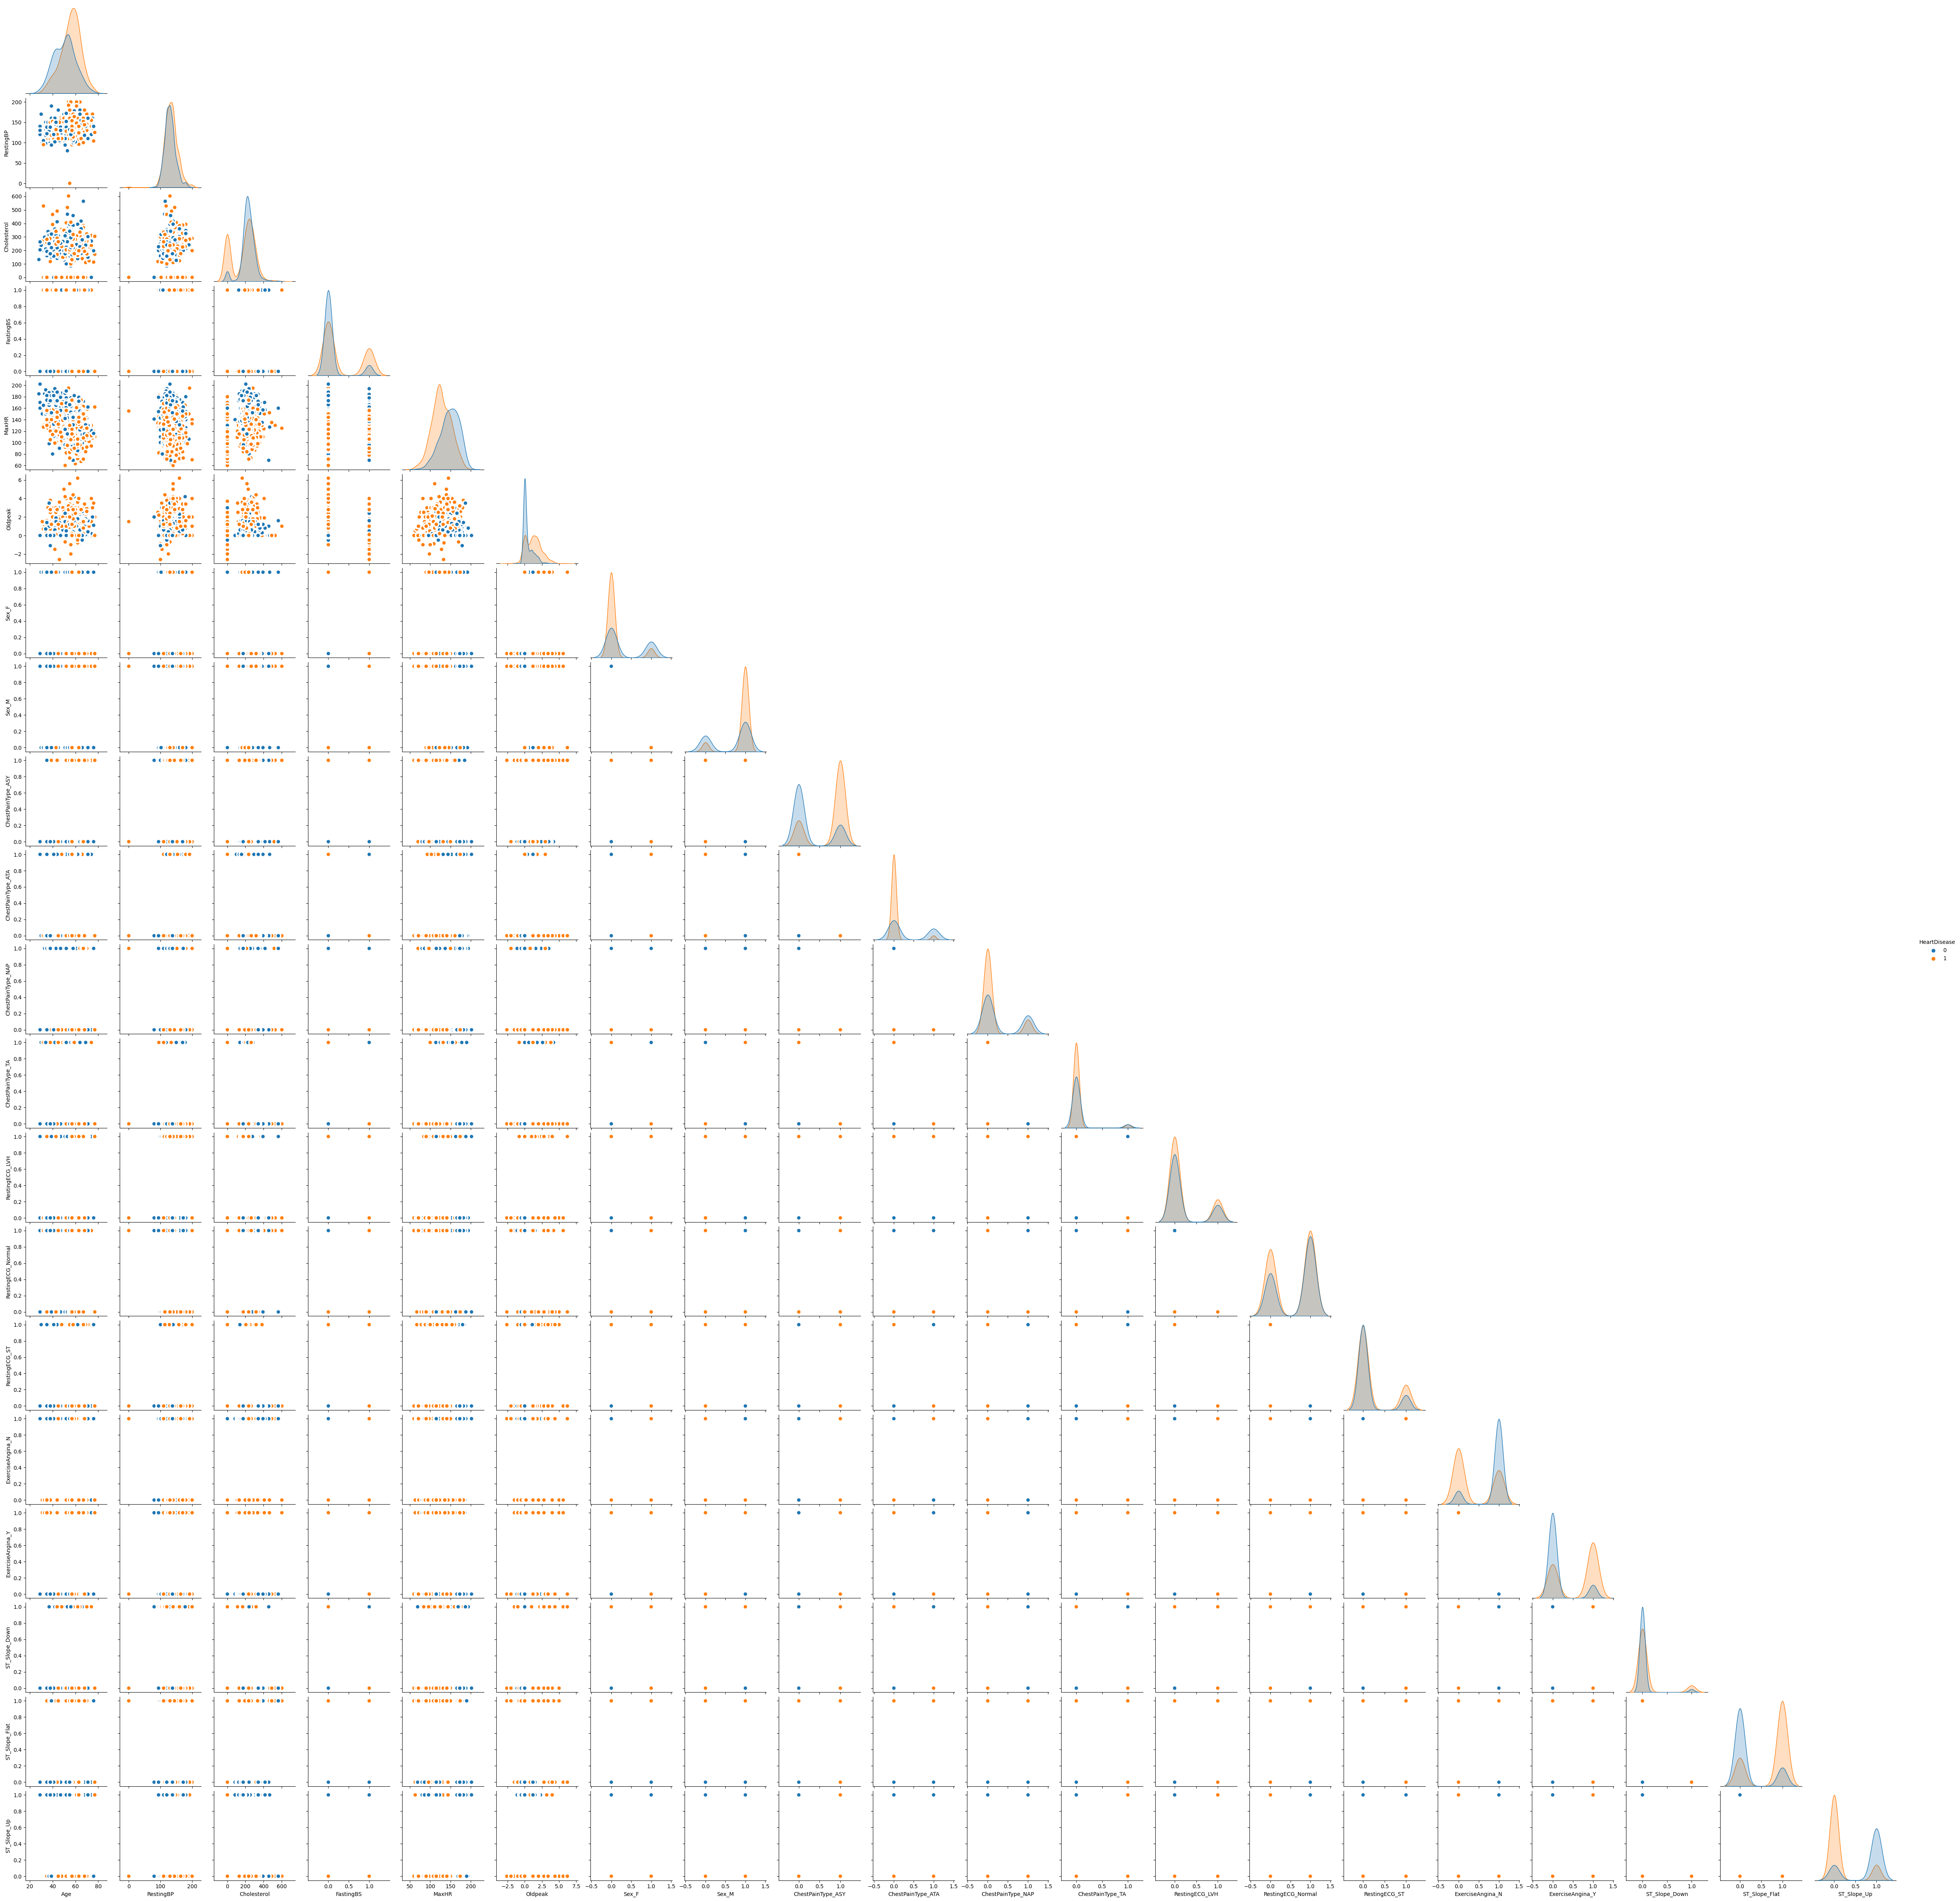

In [142]:
# df = pd.get_dummies(df) * 1
plt.figure(figsize=(5, 4), dpi = 40)
sns.pairplot(df, kind="scatter", hue="HeartDisease", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5), corner=True)
plt.show()

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    int32  
 8   Sex_M              918 non-null    int32  
 9   ChestPainType_ASY  918 non-null    int32  
 10  ChestPainType_ATA  918 non-null    int32  
 11  ChestPainType_NAP  918 non-null    int32  
 12  ChestPainType_TA   918 non-null    int32  
 13  RestingECG_LVH     918 non-null    int32  
 14  RestingECG_Normal  918 non-null    int32  
 15  RestingECG_ST      918 non-null    int32  
 16  ExerciseAngina_N   918 non

### разбиение массива на `train` `test` `80 / 20`

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y = df.HeartDisease
X = df.drop(columns='HeartDisease')
X = pd.get_dummies(X) * 1
X_scaled = scaler.fit_transform(X)

X_train, X_test,y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(734, 20) (184, 20)
(734,) (184,)


In [145]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score
data_result = []
# Подсчет основных метрик `cross_validate`
def metric_model(clf_, X_scaled_,
    short_name,
    name,
    boxplot_name,
    score_train,
    score_test,
    elapsed_time
    ):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'recall': make_scorer(recall_score),
        'precision': make_scorer(precision_score),
        'f1': make_scorer(f1_score)
    }
    cv_results = cross_validate(clf_, X_scaled_, y, cv=10, scoring=scoring)
    _delta = _score_train - _score_test
    print(f"{name}| train_score: {score_train:.4f} test_score: {score_test:.4f} | delta: {(_delta):.4f}")
    print('--------------------------------------------------------')
    print("Accuracy:", round(cv_results['test_accuracy'].mean(), 4))
    print("Recall:", round(cv_results['test_recall'].mean(), 4))
    print("Precision:", round(cv_results['test_precision'].mean(), 4))
    print("F1:", round(cv_results['test_f1'].mean(), 4))

    metrics = ['accuracy', 'recall', 'precision', 'f1']
    metric_scores = [cv_results[f'test_{metric}'] for metric in metrics]

    plt.figure(figsize=(12, 3))
    plt.boxplot(metric_scores, labels=metrics)
    plt.title(boxplot_name)
    plt.ylabel('Score')
    plt.show()
    return {
            'Model': short_name,
            'Train Score': score_train,
            'Test Score': score_test,
            'Accuracy': round(cv_results['test_accuracy'].mean(), 4),
            'Recall': round(cv_results['test_recall'].mean(), 4),
            'Precision': round(cv_results['test_precision'].mean(), 4),
            'F1': round(cv_results['test_f1'].mean(), 4),
            'Elapsed Time (s)': round(elapsed_time, 2)
        }


### `LogisticRegression` на стандартных параметрах

Cross-Validation Метрики:| train_score: 0.8719 test_score: 0.8533 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8495
Recall: 0.8676
Precision: 0.8671
F1: 0.8629


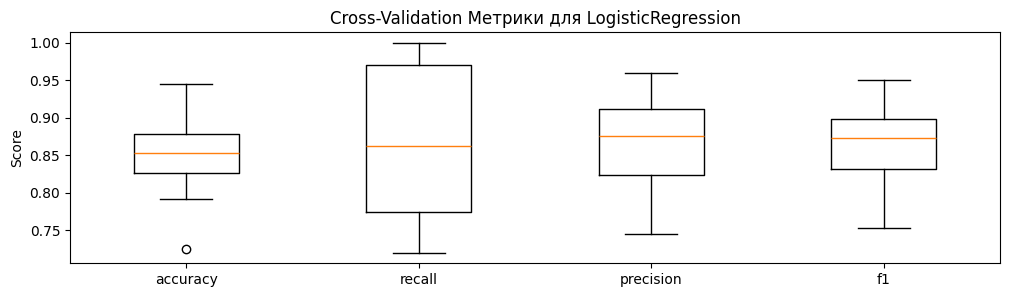

In [146]:
from sklearn.linear_model import LogisticRegression
import time

start_time = time.time()
clf = LogisticRegression()
clf.fit(X_train, y_train)

score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time

data_result.append(
    metric_model(clf, X_scaled,
        'LogisticRegression',
        "Cross-Validation Метрики:",
        'Cross-Validation Метрики для LogisticRegression',
        score_train,
        score_test,
        elapsed_time)
    )

### Оптимизация параметров `GridSearchCV`

Подобранные параметры для оптимизации: {'C': 0.1, 'max_iter': 100, 'solver': 'liblinear'}
LogisticRegression Метрика с оптимизированными параметрами GridSearchCV:| train_score: 0.8719 test_score: 0.8533 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8506
Recall: 0.8656
Precision: 0.8697
F1: 0.8635


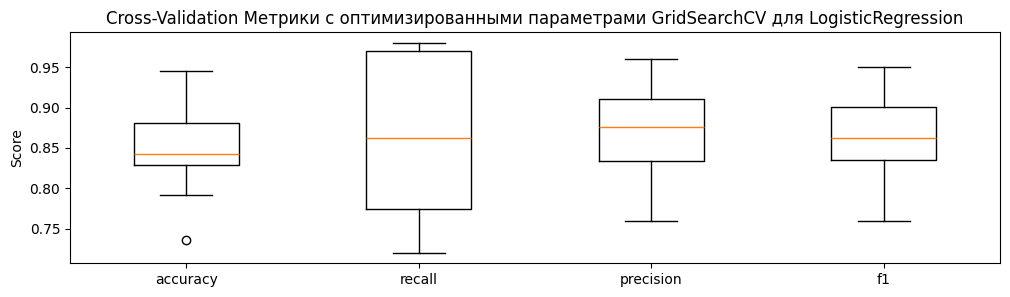

In [147]:
from sklearn.model_selection import GridSearchCV
start_time = time.time()
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Разные значения параметра регуляризации C
    'solver': ['liblinear', 'lbfgs'],  # Разные методы оптимизации
    'max_iter': [100, 200, 300]  # Разные значения максимального числа итераций
}

clf = LogisticRegression()
grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

grid_search.fit(X_scaled, y)

best_params = grid_search.best_params_
print("Подобранные параметры для оптимизации:", best_params)

clf = LogisticRegression(**best_params)
clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time

data_result.append(
    metric_model(clf, X_scaled,
    'GridSearchCV for LogisticRegression',
    "LogisticRegression Метрика с оптимизированными параметрами GridSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами GridSearchCV для LogisticRegression',
    score_train,
    score_test,
    elapsed_time)
)

### Оптимизация парамеров `RandomizedSearchCV`

Подобранные параметры для оптимизации: {'C': 0.29617860693636144, 'max_iter': 140, 'solver': 'lbfgs'}
LogisticRegression Метрика с оптимизированными параметрами RandomizedSearchCV:| train_score: 0.8719 test_score: 0.8533 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8506
Recall: 0.8696
Precision: 0.8674
F1: 0.8641


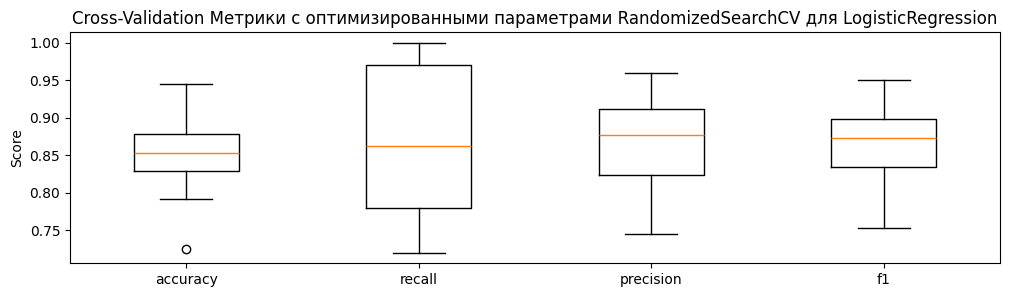

In [148]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
start_time = time.time()
param_dist = {
    'C': uniform(loc=0, scale=4),  # Распределение параметра регуляризации C
    'solver': ['liblinear', 'lbfgs'],  # Разные методы оптимизации
    'max_iter': randint(100, 300)  # Распределение максимального числа итераций
}

clf = LogisticRegression()
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, n_iter=100, cv=10, scoring='accuracy', random_state=42)
random_search.fit(X_scaled, y)
best_params = random_search.best_params_
print("Подобранные параметры для оптимизации:", best_params)

clf = LogisticRegression(**best_params)
clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time

data_result.append(metric_model(clf, X_scaled,
    'RandomizedSearchCV for LogisticRegression',
    "LogisticRegression Метрика с оптимизированными параметрами RandomizedSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами RandomizedSearchCV для LogisticRegression',
    score_train,
    score_test,
    elapsed_time)
)

### Оптимизация нескольких моделей и вариация параметров

In [150]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform, randint

# Определите распределения гиперпараметров для каждой модели
param_dist_rf = {
    'n_estimators': randint(100, 1000),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_dist_gb = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.5),
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10]
}

param_dist_svc = {
    'C': uniform(loc=0, scale=4),
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

param_dist_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

clf_rf = RandomForestClassifier()
clf_gb = GradientBoostingClassifier()
clf_svc = SVC()
clf_knn = KNeighborsClassifier()

random_search_rf = RandomizedSearchCV(clf_rf, param_distributions=param_dist_rf, n_iter=10, cv=10, scoring='accuracy', random_state=42)
random_search_gb = RandomizedSearchCV(clf_gb, param_distributions=param_dist_gb, n_iter=10, cv=10, scoring='accuracy', random_state=42)
random_search_svc = RandomizedSearchCV(clf_svc, param_distributions=param_dist_svc, n_iter=10, cv=10, scoring='accuracy', random_state=42)
random_search_knn = RandomizedSearchCV(clf_knn, param_distributions=param_dist_knn, n_iter=10, cv=10, scoring='accuracy', random_state=42)

start_time = time.time()
random_search_rf.fit(X_scaled, y)
end_time = time.time()
clf_rf_elapsed_time = end_time - start_time
print('clf_rf_elapsed_time', clf_rf_elapsed_time)

start_time = time.time()
random_search_gb.fit(X_scaled, y)
end_time = time.time()
random_search_gb_elapsed_time = end_time - start_time
print('random_search_gb_elapsed_time', random_search_gb_elapsed_time)

start_time = time.time()
random_search_svc.fit(X_scaled, y)
end_time = time.time()
random_search_svc_elapsed_time = end_time - start_time
print('random_search_svc_elapsed_time', random_search_svc_elapsed_time)

start_time = time.time()
random_search_knn.fit(X_scaled, y)
end_time = time.time()
random_search_knn_elapsed_time = end_time - start_time
print('random_search_knn', random_search_knn_elapsed_time)

best_params_rf = random_search_rf.best_params_
best_params_gb = random_search_gb.best_params_
best_params_svc = random_search_svc.best_params_
best_params_knn = random_search_knn.best_params_

print("Подобранные параметры для оптимизации: Random Forest Classifier:", best_params_rf)
print("Подобранные параметры для оптимизации:  Gradient Boosting Classifier:", best_params_gb)
print("Подобранные параметры для оптимизации:  Support Vector Classifier:", best_params_svc)
print("Подобранные параметры для оптимизации:  K-Nearest Neighbors Classifier:", best_params_knn)

clf_rf_elapsed_time 69.94026947021484
random_search_gb_elapsed_time 110.08089208602905
random_search_svc_elapsed_time 1.6618874073028564
random_search_knn 0.42613983154296875
Подобранные параметры для оптимизации: Random Forest Classifier: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 559}
Подобранные параметры для оптимизации:  Gradient Boosting Classifier: {'learning_rate': 0.08799726016810132, 'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 187}
Подобранные параметры для оптимизации:  Support Vector Classifier: {'C': 3.329770563201687, 'gamma': 'auto', 'kernel': 'rbf'}
Подобранные параметры для оптимизации:  K-Nearest Neighbors Classifier: {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


RandomForestClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:| train_score: 0.9877 test_score: 0.8804 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8594
Recall: 0.8895
Precision: 0.865
F1: 0.8735


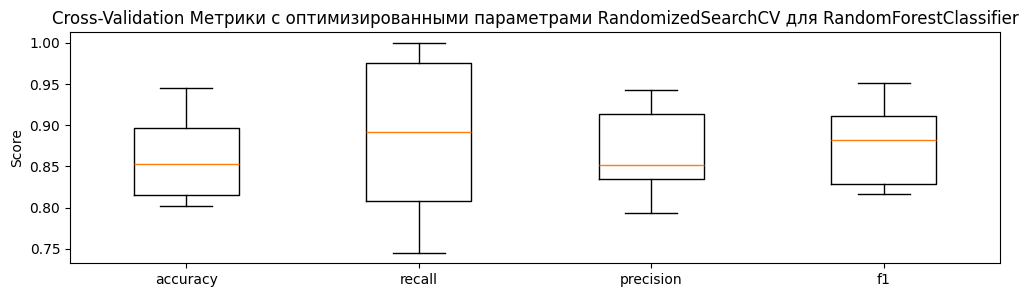

In [151]:
# Для модели RandomForestClassifier
start_time = time.time()
best_params_rf = random_search_rf.best_params_
clf_rf = RandomForestClassifier(**best_params_rf)
clf_rf.fit(X_train, y_train)
score_train_rf = clf_rf.score(X_train, y_train)
score_test_rf = clf_rf.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time + clf_rf_elapsed_time

data_result.append(metric_model(clf_rf,
    X_scaled,
    'RandomizedSearchCV for RandomForestClassifier',
    "RandomForestClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами RandomizedSearchCV для RandomForestClassifier',
    score_train_rf, score_test_rf,
    elapsed_time)
)

GradientBoostingClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:| train_score: 1.0000 test_score: 0.8750 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.855
Recall: 0.8757
Precision: 0.8684
F1: 0.8685


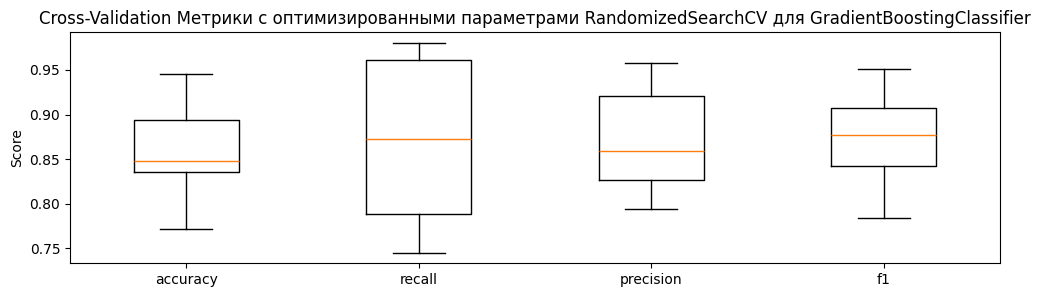

In [152]:
# Для модели GradientBoostingClassifier
start_time = time.time()
best_params_gb = random_search_gb.best_params_
clf_gb = GradientBoostingClassifier(**best_params_gb)
clf_gb.fit(X_train, y_train)
score_train_gb = clf_gb.score(X_train, y_train)
score_test_gb = clf_gb.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time + random_search_gb_elapsed_time

data_result.append(metric_model(clf_gb,
    X_scaled,
    'RandomizedSearchCV for GradientBoostingClassifier',
    "GradientBoostingClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами RandomizedSearchCV для GradientBoostingClassifier',
    score_train_gb, score_test_gb,
    elapsed_time)
)

SupportVectorClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:| train_score: 0.9210 test_score: 0.8804 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8485
Recall: 0.8756
Precision: 0.8602
F1: 0.8636


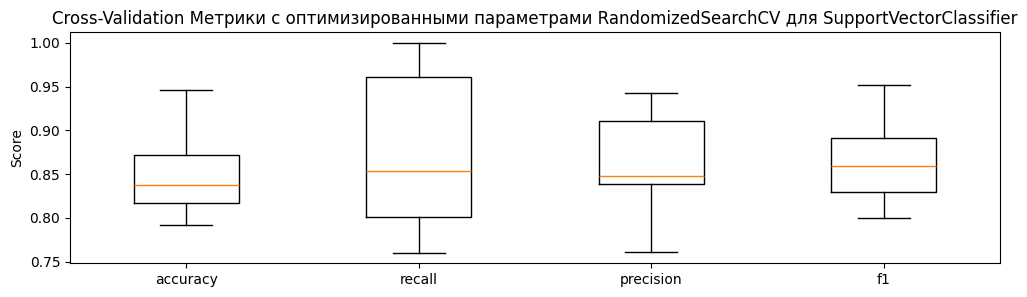

In [153]:
# Для модели Support Vector Classifier
start_time = time.time()
best_params_svc = random_search_svc.best_params_
clf_svc = SVC(**best_params_svc)
clf_svc.fit(X_train, y_train)
score_train_svc = clf_svc.score(X_train, y_train)
score_test_svc = clf_svc.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time + random_search_svc_elapsed_time

data_result.append(metric_model(clf_svc,
    X_scaled,
    'RandomizedSearchCV for SVC',
    "SupportVectorClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами RandomizedSearchCV для SupportVectorClassifier',
    score_train_svc, score_test_svc,
    elapsed_time)
)

KNearestNeighborsClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:| train_score: 1.0000 test_score: 0.8696 | delta: 0.0187
--------------------------------------------------------
Accuracy: 0.8616
Recall: 0.8875
Precision: 0.8695
F1: 0.8755


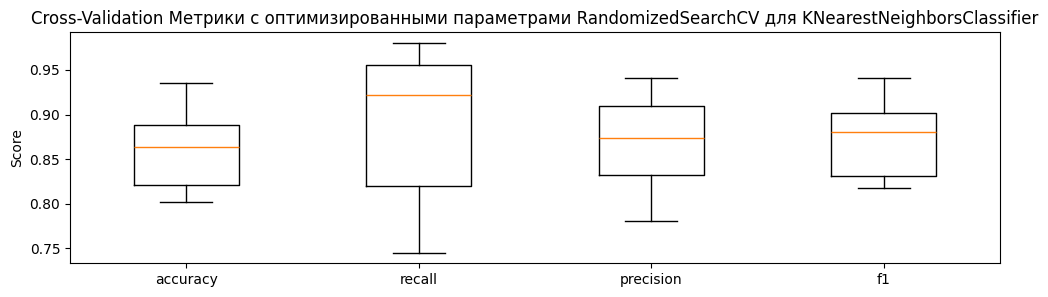

In [155]:
# Для модели K-Nearest Neighbors
start_time = time.time()
best_params_knn = random_search_knn.best_params_
clf_knn = KNeighborsClassifier(**best_params_knn)
clf_knn.fit(X_train, y_train)
score_train_knn = clf_knn.score(X_train, y_train)
score_test_knn = clf_knn.score(X_test, y_test)

end_time = time.time()
elapsed_time = end_time - start_time + random_search_knn_elapsed_time

data_result.append(metric_model(clf_knn,
    X_scaled,
    'RandomizedSearchCV for K-Nearest Neighbors',
    "KNearestNeighborsClassifier Метрика с оптимизированными параметрами RandomizedSearchCV:",
    'Cross-Validation Метрики с оптимизированными параметрами RandomizedSearchCV для KNearestNeighborsClassifier',
    score_train_knn, score_test_knn,
    elapsed_time)
)

In [156]:
pd.DataFrame(data_result)

,Model,Train Score,Test Score,Accuracy,Recall,Precision,F1,Elapsed Time (s)
0,LogisticRegression,0.871935,0.853261,0.8495,0.8676,0.8671,0.8629,0.01
1,GridSearchCV for LogisticRegression,0.871935,0.853261,0.8506,0.8656,0.8697,0.8635,1.25
2,RandomizedSearchCV for LogisticRegression,0.871935,0.853261,0.8506,0.8696,0.8674,0.8641,3.56
3,RandomizedSearchCV for RandomForestClassifier,0.987738,0.880435,0.8594,0.8895,0.8650,0.8735,70.73
4,RandomizedSearchCV for GradientBoostingClassifier,1.000000,0.875000,0.8550,0.8757,0.8684,0.8685,110.48
5,RandomizedSearchCV for SVC,0.920981,0.880435,0.8485,0.8756,0.8602,0.8636,1.69
6,RandomizedSearchCV for K-Nearest Neighbors,1.000000,0.869565,0.8616,0.8875,0.8695,0.8755,0.44


### Вывод

1. `SVC` модель с  `RandomizedSearchCV`
   1. показала улучшение по сравнению с другими методами при учете параметра оптимального обучения, так как `RandomizedSearchCV for LogisticRegression` имя чуть лучшие метрики, явно слегка переобучена
   2. `train_score`: `0.920981` `test_score`: `0.880435`
   3. `Accuracy`: `0.8485`
   4. `Recall`: `0.8756`
   5. `Precision`: `0.8602`
   6. `F1`: `0.8636`
   7. При этом время обучения с учетом подбора параметров составило `1.69`

2. Сравните с полученными результатами в домашнем задании по теме «Ансамблирование».
   1. `BaggingClassifier` с пред обученными моделями `DecisionTreeClassifier` `train` `0.90` BaggingClassifier test `0.88`
   2. при этом f1-score `DecisionTreeClassifier` был на уровне `0.87`
   3. но важно отметить, что для обучения не брались категориальные переменные в `Ансамблирование`, что однозначно влияет на параметры обучения модели

**Итог**
Выбор методов зависит от решаемой задачи, размера и распределения входных данных, и специфики решаемой задачи
